In [ ]:
# 用户输入文本（贷款申请描述或自由文本）Text
# 收入（年收入/月收入，单位为元或美元等）Income
# 信用评分（如FICO评分、芝麻信用分等）Credit_Score
# 贷款金额（用户申请的贷款总额）Loan_Amount
# 债务收入比（债务与收入的比值，用于风险评估）DTI_Ratio  
# 就业状态（用户当前就业类型，如全职、自由职业等）Employment_Status  
# 审批结果（贷款是否通过，通常为布尔值或分类标签）Approval  
# 特征：贷款申请描述、年收入、信用评分、贷款金额、债务收入比、就业状态、审批结果

#防止警告以获得更干净的输出
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
df = pd.read_csv('data/loan_data.csv')

In [62]:
# Display the first few rows
print('First five rows of the dataset:')
display(df.head())

# Get information about the data types and non-null counts
print('Dataset information:')
df.info()

# Summary statistics for numeric columns
print('Summary statistics for numeric columns:')
display(df.describe())

First five rows of the dataset:


,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vacation with my family.,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installing solar panels.,197392,389,111604,22.14,employed,Rejected
2,"I need a loan for home renovation, including a kitchen remodel.",44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and appliances for my house.,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Text               24000 non-null  object 
 1   Income             24000 non-null  int64  
 2   Credit_Score       24000 non-null  int64  
 3   Loan_Amount        24000 non-null  int64  
 4   DTI_Ratio          24000 non-null  float64
 5   Employment_Status  24000 non-null  object 
 6   Approval           24000 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.3+ MB
Summary statistics for numeric columns:


,Income,Credit_Score,Loan_Amount,DTI_Ratio
count,24000.000000,24000.000000,24000.000000,24000.000000
mean,110377.552708,575.720333,44356.154833,34.719167
std,51729.677627,159.227621,34666.604785,32.322471
min,20001.000000,300.000000,1005.000000,2.530000
25%,65635.750000,437.000000,16212.000000,14.507500
50%,110464.000000,575.000000,35207.000000,24.860000
75%,155187.000000,715.000000,65622.750000,41.840000
max,200000.000000,850.000000,158834.000000,246.330000


#### 暂时想法：若要合成为文本可能的形式我猜测是
one row -->
text:(string),income:(num),credit_score:(num),loan_amount:(num),dti_ratio:(num) employment_status:(string),approval:(string)

Missing values in each column:


Text                 0
Income               0
Credit_Score         0
Loan_Amount          0
DTI_Ratio            0
Employment_Status    0
Approval             0
dtype: int64

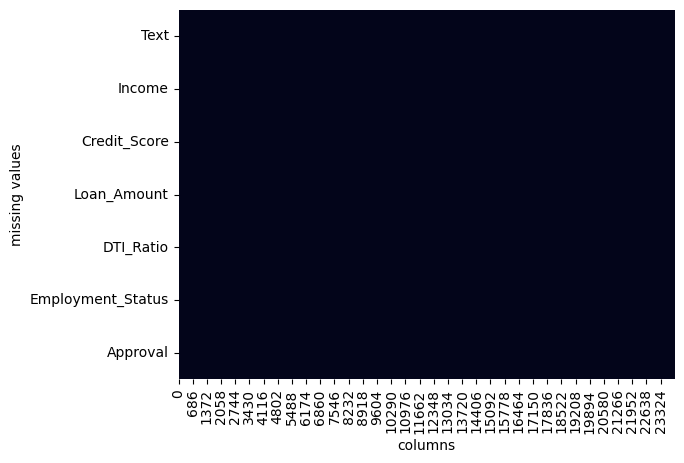

In [63]:
# 参看数据缺失情况
import seaborn as sns
import matplotlib.pyplot as plt

# 通过图像查看缺失值
print('Missing values in each column:')
display(df.isnull().sum())

ax = plt.axes()
sns.heatmap(df.isna().transpose(), cbar=False, ax=ax)

plt.xlabel('columns')
plt.ylabel('missing values')

plt.show()

# 无缺失，完美

In [64]:
# 检查缺失值或空值并处理它们
if df.isnull().sum().sum() > 0:
    # 为了简单起见，删除缺失值的行
    df = df.dropna()
    print('删除了包含缺失值的行')
else:
    print('未发现缺失值')

未发现缺失值


In [65]:
# 如有必要，将列转换为适当的数据类型
# 在我们的数据集中，Income、Credit_Score、Loan_Amount和DTI_Ratio等数字列应为数字。

numeric_columns = ['Income', 'Credit_Score', 'Loan_Amount', 'DTI_Ratio']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#“批准”列是我们的目标，目前是一个字符串。让我们把它编码为一个数字二进制变量。
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Approval_Label'] = le.fit_transform(df['Approval'])

#（可选）使用单热编码对其他分类列（例如，Employment_Status）进行编码
# df = pd.get_dummies(df, columns=['Employment_Status'], drop_first=True)

print('数据清洗和预处理完成')
df.head()

数据清洗和预处理完成


,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval,Approval_Label
0,I need a loan to pay for an international vacation with my family.,26556,581,8314,79.26,employed,Rejected,1
1,I want to make home improvements like installing solar panels.,197392,389,111604,22.14,employed,Rejected,1
2,"I need a loan for home renovation, including a kitchen remodel.",44561,523,34118,45.44,employed,Rejected,1
3,I need funds to buy new furniture and appliances for my house.,190363,729,118757,10.22,unemployed,Rejected,1
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved,0


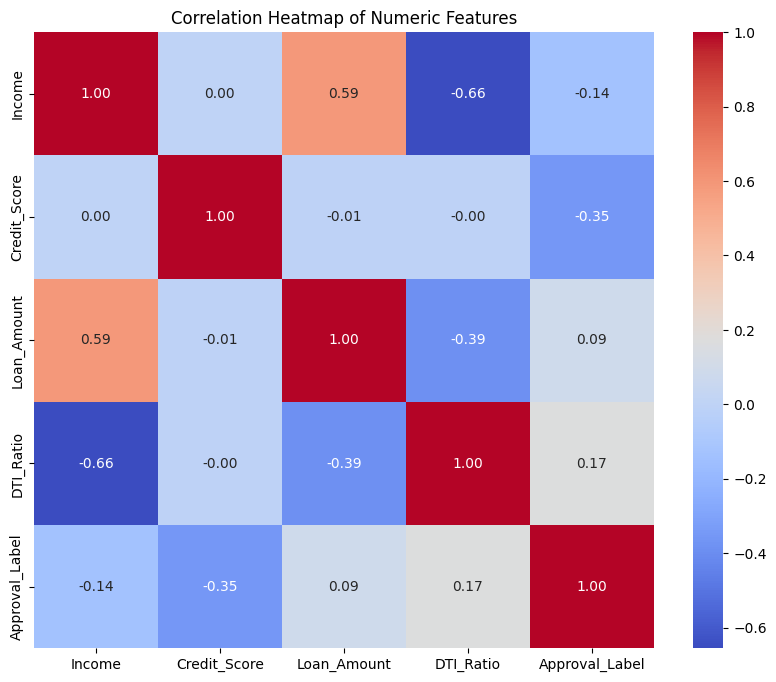

In [66]:
# 数字相关性热力图
# 可视化数值变量之间的相关性（仅当有4个或更多数值列时）
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

#### 可以看出 信用评分 和 债务收入比 是较强相关
由于我们优先考虑文本的作用，可能后面会对 这两组数据中的差异值进行筛选

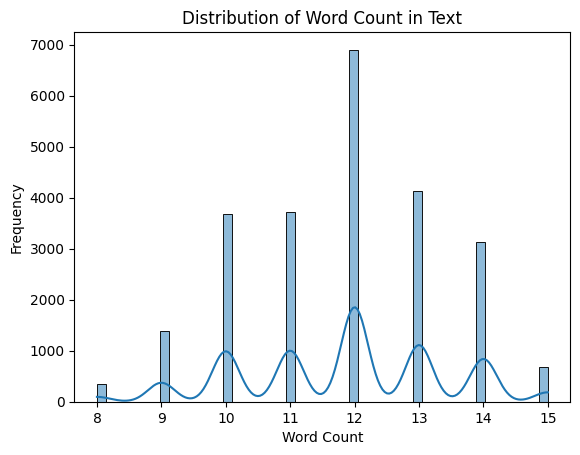

In [67]:
# 查看本文字数
df["words_in_text"] = df["Text"].str.split().str.len()

# 查看文本长度分布
sns.histplot(df["words_in_text"], bins=50, kde=True)
plt.title("Distribution of Word Count in Text")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


In [68]:
# 查看words_in_text为8的行
df[df["words_in_text"] == 8].head(3)
# 虽然都是需要海外就医但是其他状态是不同的，所以暂时保留

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval,Approval_Label,words_in_text
283,I need financial support for medical treatment abroad.,55350,364,3423,63.22,unemployed,Rejected,1,8
359,I need financial support for medical treatment abroad.,95882,338,40110,5.85,employed,Rejected,1,8
437,I need financial support for medical treatment abroad.,132978,759,73710,31.21,unemployed,Rejected,1,8


#### 为了更好的预测结果，我会根据，text的内容匹配到最相似的句子
其实这是一种过滤，在text相近的情况下，再去通过其他特征进行预测 approval的结果
所以，当我对文本进行处理的时候会保留这条记录的id和text，以方便在我通过输入 input text后，
匹配到最相似的text后，能顺利找到其他特征（比如：收入，信用评分等），来预测结果

In [72]:
# 多加一列id，方便后续处理
df['id'] = df.index
df["tagged_text"] = df[["id", "Text"]].astype(str).agg(" ".join, axis=1)
df.head(3)

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval,Approval_Label,words_in_text,id,tagged_text
0,I need a loan to pay for an international vacation with my family.,26556,581,8314,79.26,employed,Rejected,1,13,0,0 I need a loan to pay for an international vacation with my family.
1,I want to make home improvements like installing solar panels.,197392,389,111604,22.14,employed,Rejected,1,10,1,1 I want to make home improvements like installing solar panels.
2,"I need a loan for home renovation, including a kitchen remodel.",44561,523,34118,45.44,employed,Rejected,1,11,2,"2 I need a loan for home renovation, including a kitchen remodel."


In [73]:
# df去掉words_in_text和Approval_Label，并保存
df = df.drop(columns=["words_in_text", "Approval_Label"])
df.to_csv('data/loan_data_cleaned.csv', index=False)